In [ ]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = {
    "review": [
        "I love this product",
        "This is a great movie",
        "Excellent performance",
        "I am very happy",
        "I like this place",
        "Worst experience ever",
        "I hate this product",
        "This movie is terrible",
        "Very bad quality",
        "I am disappointed",
        "Amazing phone",
        "Not worth money",
        "Fantastic service",
        "Poor support",
        "Loved it",
        "Horrible experience"
    ],
    "sentiment": [1,1,1,1,1, 0,0,0,0,0, 1,0,1,0,1,0]
}

df = pd.DataFrame(data)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    return text

df["review"] = df["review"].apply(clean_text)
labels = [1,1,1,1,1, 0,0,0,0,0]

In [ ]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df["review"])
y = df["sentiment"]

print("Vocabulary:\n", vectorizer.get_feature_names_out())

Vocabulary:
 ['am' 'amazing' 'bad' 'disappointed' 'ever' 'excellent' 'experience'
 'fantastic' 'great' 'happy' 'hate' 'horrible' 'is' 'it' 'like' 'love'
 'loved' 'money' 'movie' 'not' 'performance' 'phone' 'place' 'poor'
 'product' 'quality' 'service' 'support' 'terrible' 'this' 'very' 'worst'
 'worth']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
model = BernoulliNB()
model.fit(X_train, y_train)


BernoulliNB()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


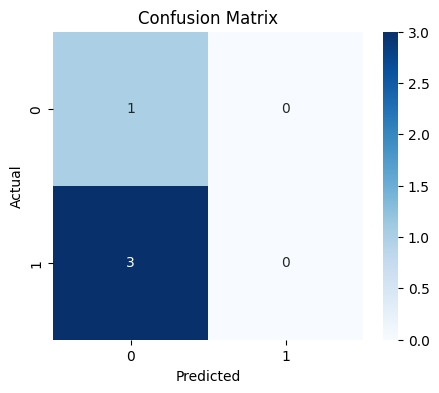

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()